In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [37]:
df.shape

(4269, 13)

In [38]:
df.duplicated().sum()

0

In [39]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [41]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [42]:
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [43]:
df[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [47]:
df[' education'] = df[' education'].replace({' Graduate':1,' Not Graduate':0})
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   int64 
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(11), object(2)
memory usage: 433.7+ KB


In [50]:
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [51]:
df[' self_employed'] = df[' self_employed'].replace({' Yes':1,' No':0})
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [52]:
df[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [53]:
df[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [54]:
#So the target column is not properly balanced. we will balance it using oversampling technique


In [55]:
#Now all the assets columns can be compressed into 1 column named Assets
df['Assets'] = df[' residential_assets_value'] + df[' commercial_assets_value'] + df[' luxury_assets_value'] + df[' bank_asset_value']
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Assets
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000


In [56]:
df = df.drop([' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value'],axis=1)
df.head()   

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,1,2,1,0,9600000,29900000,12,778,Approved,50700000
1,2,0,0,1,4100000,12200000,8,417,Rejected,17000000
2,3,3,1,0,9100000,29700000,20,506,Rejected,57700000
3,4,3,1,0,8200000,30700000,8,467,Rejected,52700000
4,5,5,0,1,9800000,24200000,20,382,Rejected,55000000


In [58]:
df[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [60]:
#the data in target column is imbalanced. So we will now oversample it
#Just apply oversampling in target column

from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df[' loan_status']==' Approved')] 
df_minority = df[(df[' loan_status']==' Rejected')] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2656, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df = pd.concat([df_minority_upsampled, df_majority])

df[' loan_status'].value_counts()

 loan_status
Rejected    2656
Approved    2656
Name: count, dtype: int64

<Axes: xlabel=' loan_status', ylabel='Count'>

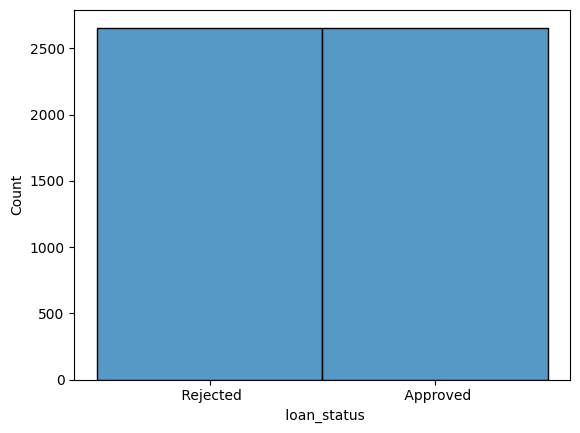

In [62]:
sns.histplot(df[' loan_status'])

In [67]:
df[' loan_status'] = df[' loan_status'].replace({' Approved':1,' Rejected':0})
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
2974,2975,5,1,0,7500000,15800000,18,458,0,45100000
3826,3827,1,1,1,3400000,12300000,8,523,0,21700000
2234,2235,2,0,0,4100000,16200000,6,546,0,25400000
3371,3372,1,1,1,6800000,17600000,14,344,0,36900000
2982,2983,5,1,0,4500000,16900000,18,455,0,21500000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5312 entries, 2974 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   loan_id            5312 non-null   int64
 1    no_of_dependents  5312 non-null   int64
 2    education         5312 non-null   int64
 3    self_employed     5312 non-null   int64
 4    income_annum      5312 non-null   int64
 5    loan_amount       5312 non-null   int64
 6    loan_term         5312 non-null   int64
 7    cibil_score       5312 non-null   int64
 8    loan_status       5312 non-null   int64
 9   Assets             5312 non-null   int64
dtypes: int64(10)
memory usage: 585.5 KB


In [68]:
df[' loan_status'].unique()

array([0, 1])

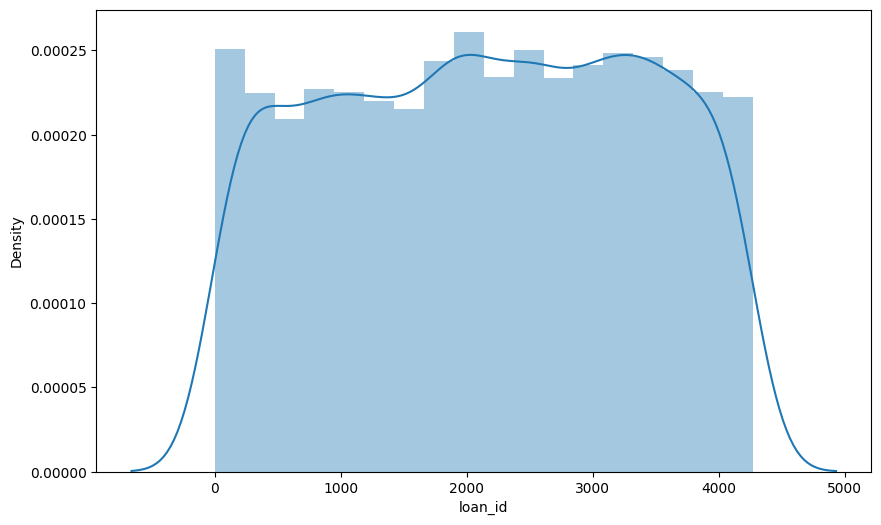

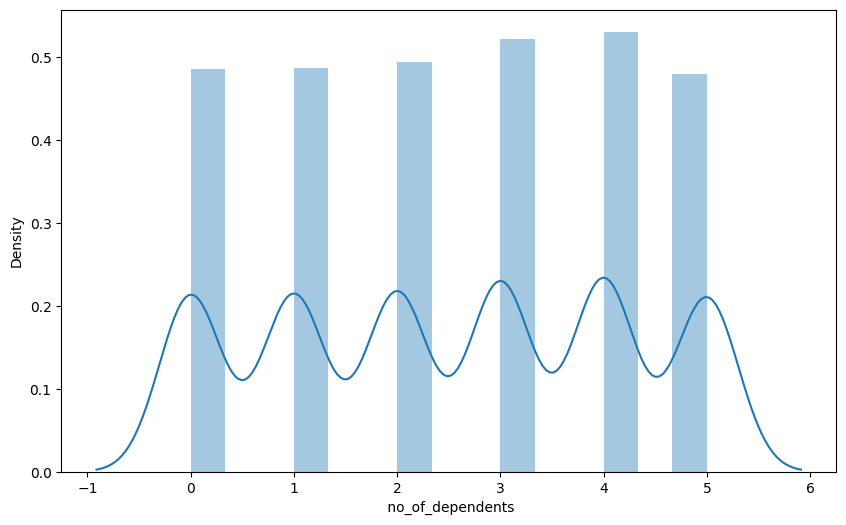

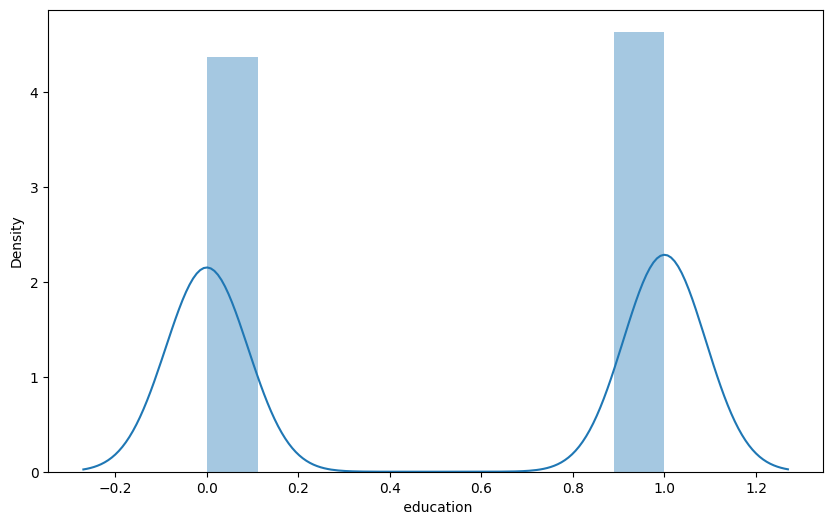

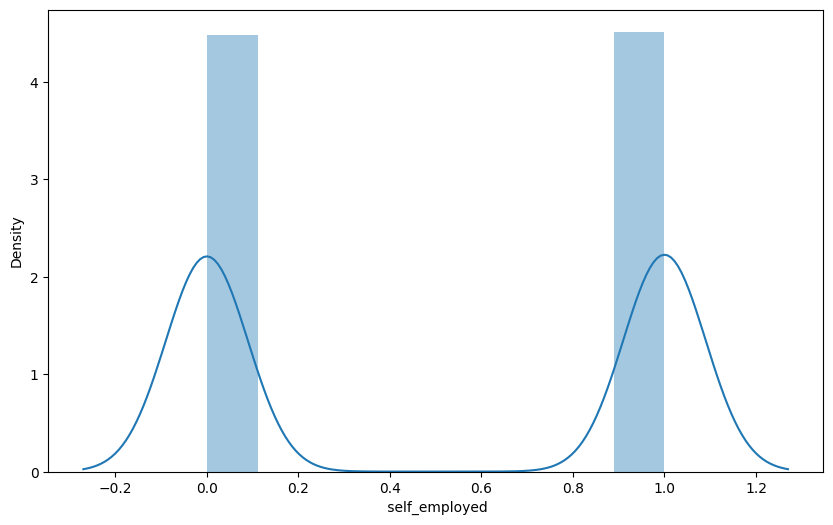

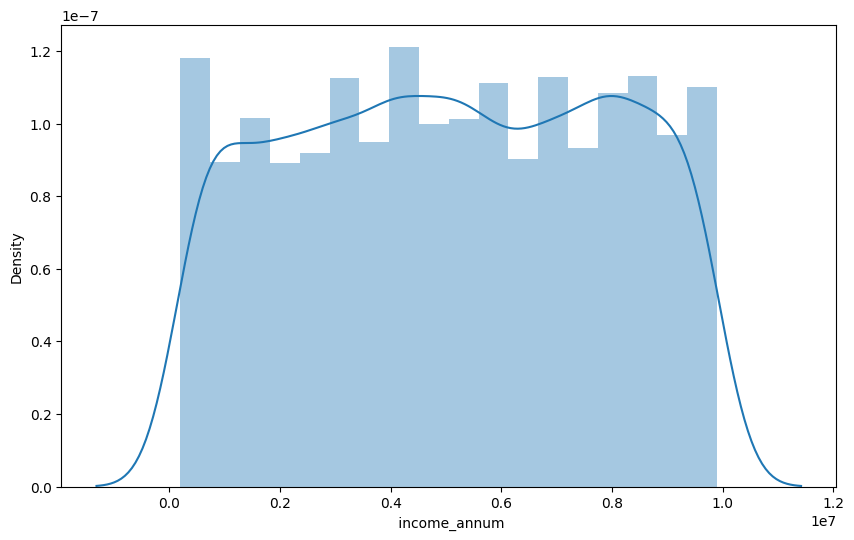

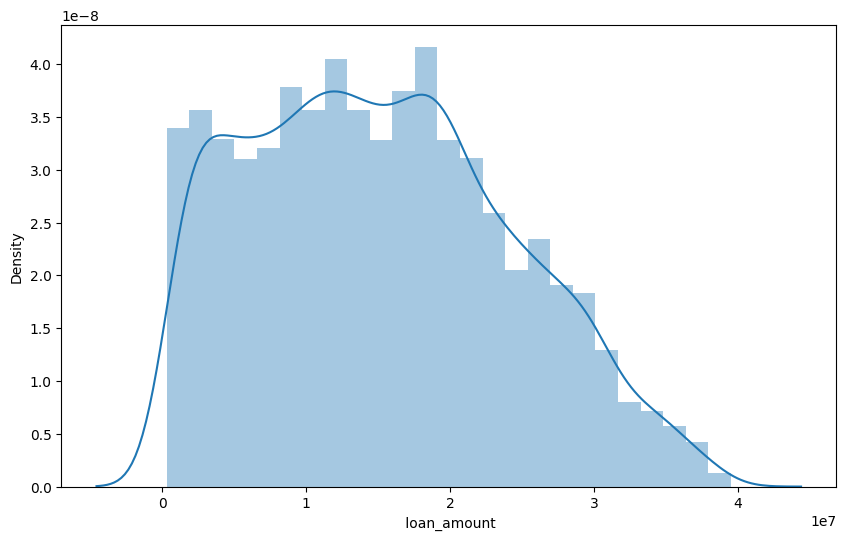

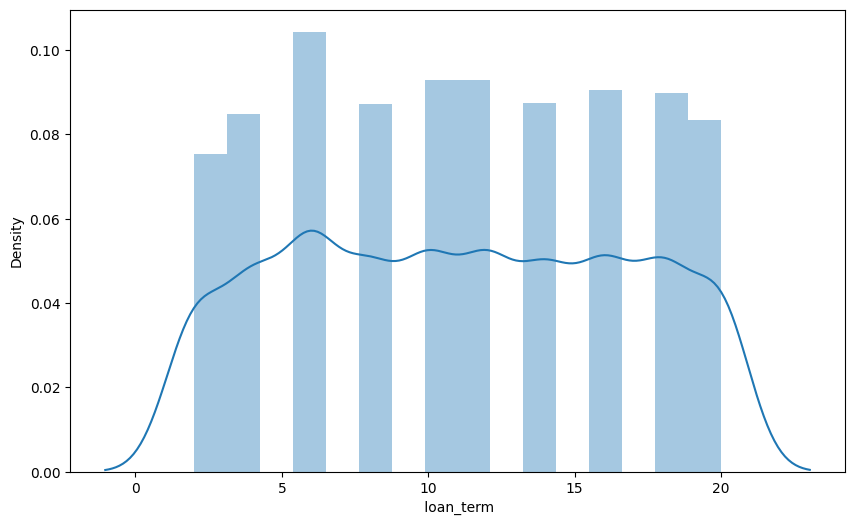

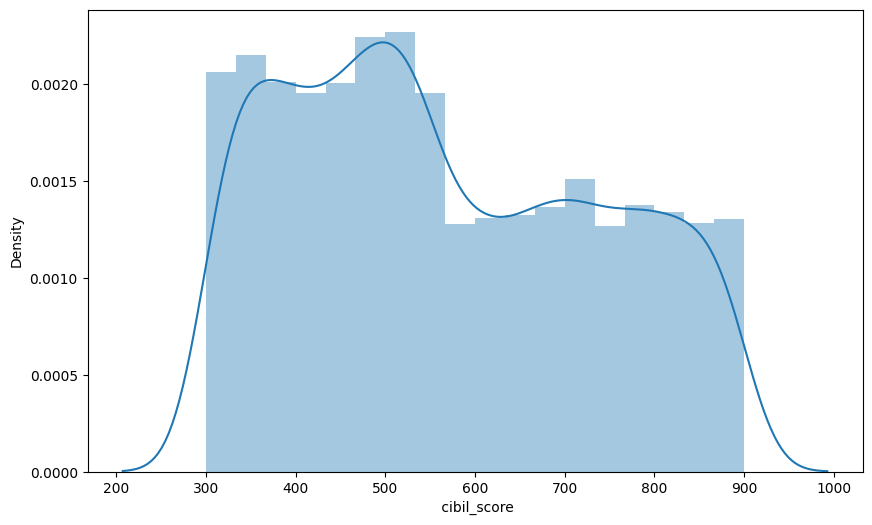

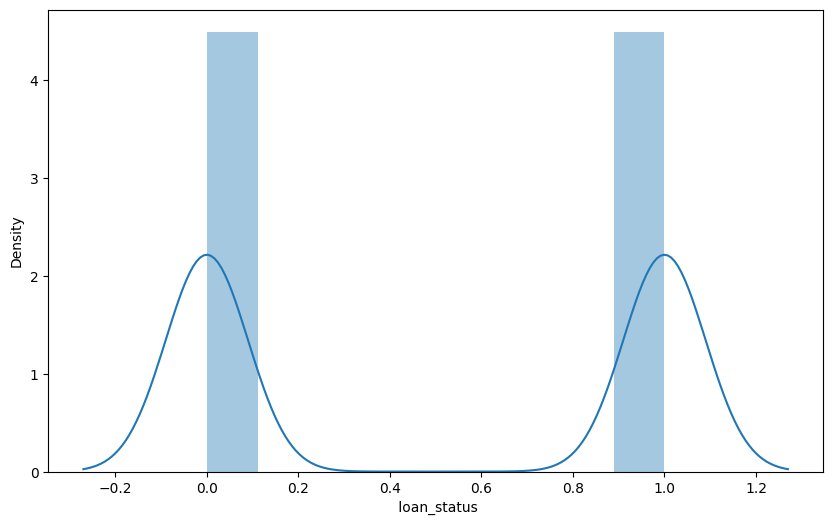

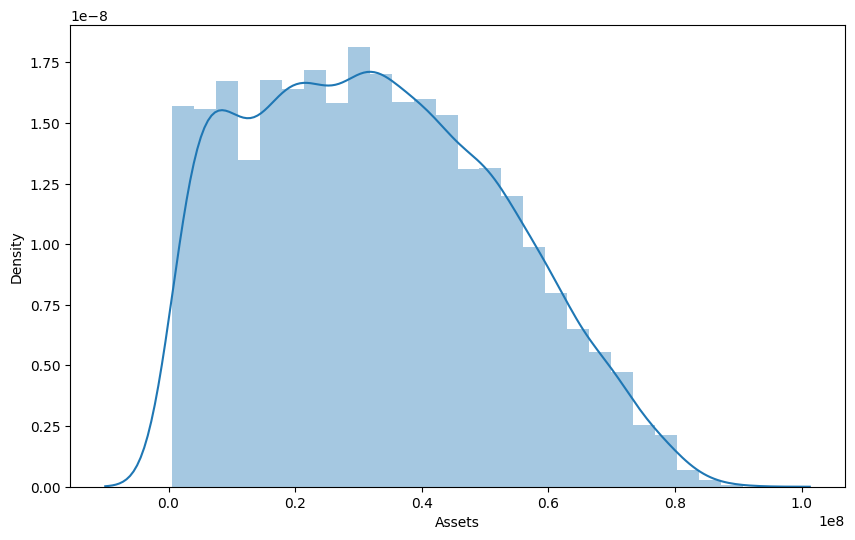

In [72]:

#check dist of all columns
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])
  plt.show()


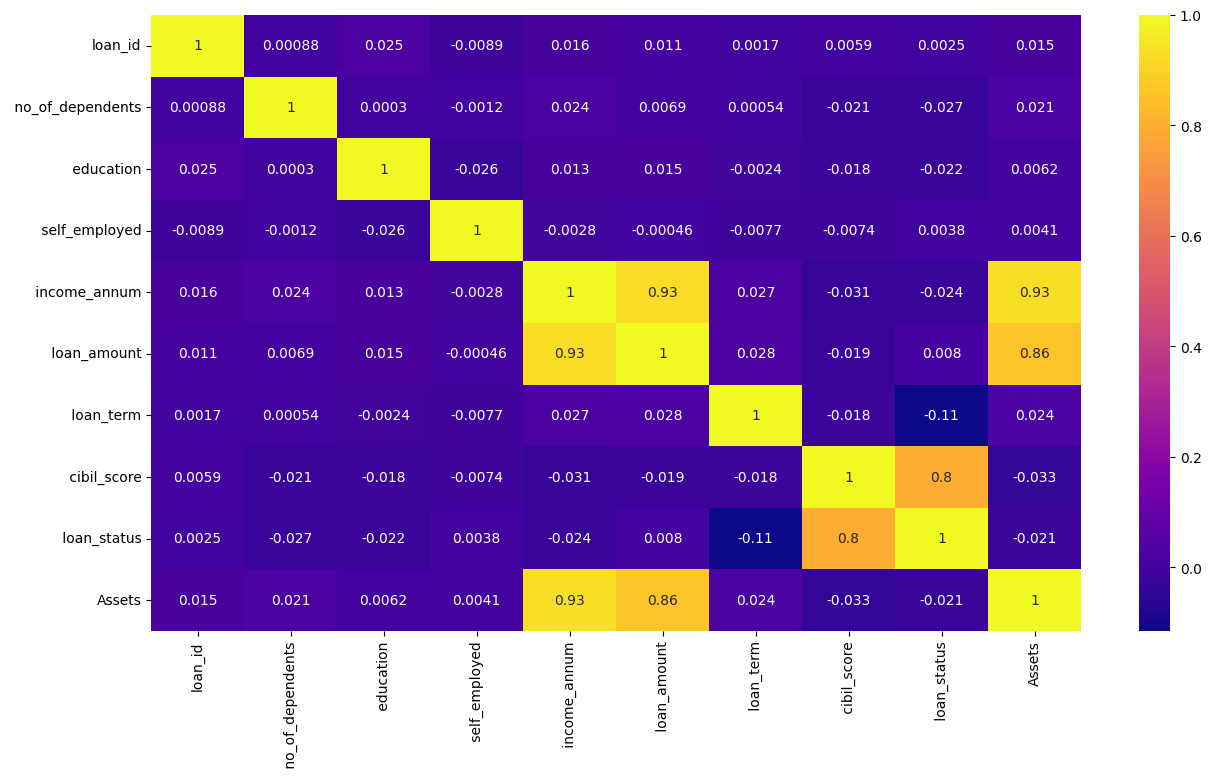

In [74]:
#Now check the correlation
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

In [ ]:
x = df.drop([' loan_status'],axis=1)
y = df[' loan_status']


#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)
svr.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)
lgb.fit(x_train_scaled,y_train)
gpr.fit(x_train_scaled,y_train)

In [71]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)

LINEAR REG  0.6078461309901007
RIDGE  0.6078339168373275
LASSO  -0.0007320406163773274
ELASTICNET -0.0007320406163773274
RANDOM FOREST  0.9619291195636775
GB 0.9327746556447446
ADABOOST 0.9075752180111171
XGB 0.9625670384811094
KNN 0.6602736931576709
SVR 0.7520341859438547
CAT 0.9664680823541034
LIGHTGBM 0.9647118526189349
GUASSIAN PROCESS 0.7404075655851712


In [75]:
#NOW save the best model
#I will save the catboost regressor model
import pickle
pickle.dump(cat,open('cat.pkl','wb'))
pickle.dump(ss,open('scaler.pkl','wb'))

MODEL BUILDING IS NOW COMPLETED. NOW YOU CAN MAKE A WEBB APP USING STREAMLIT. MY WEBAPP FOR THIS PROJECT IS UPLOADED IN MY REPLIT. YOU CAN CHECK IT OUT FROM MY REPLIT ACCOUNT